# Task 5 Sales Predictions using Machine Learning

**1.Importing Python's librarires Pandas, Numpy, matplotlib, seaborn, scikit-learn**

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

**2. Reading 'Advertising.csv' file use pandas.**

In [2]:
adv = pd.read_csv('Advertising.csv')
adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
adv.shape

(200, 5)

In [4]:
adv.drop('Unnamed: 0',inplace =True, axis =1)

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
adv.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

**Stastical discription of the dataset.**

In [8]:
adv.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


**Chcek for correlation in the columns of the data.**

In [9]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**Heat Map which is used to visulazing the correaltion between columns of the dataset.**

Text(0.5, 1.0, 'Heat map')

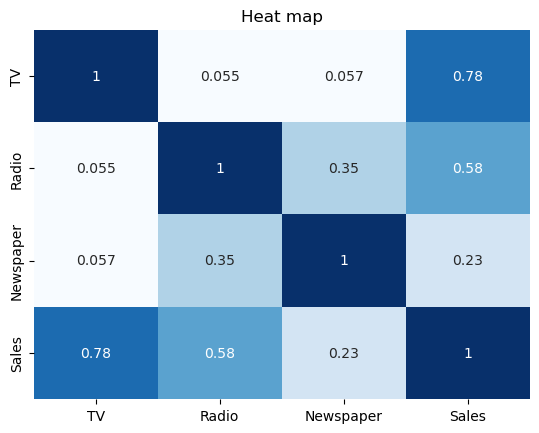

In [10]:
sns.heatmap(adv.corr(),annot =True,cbar= False,cmap ='Blues')
plt.title('Heat map')

**Making pair plot.**

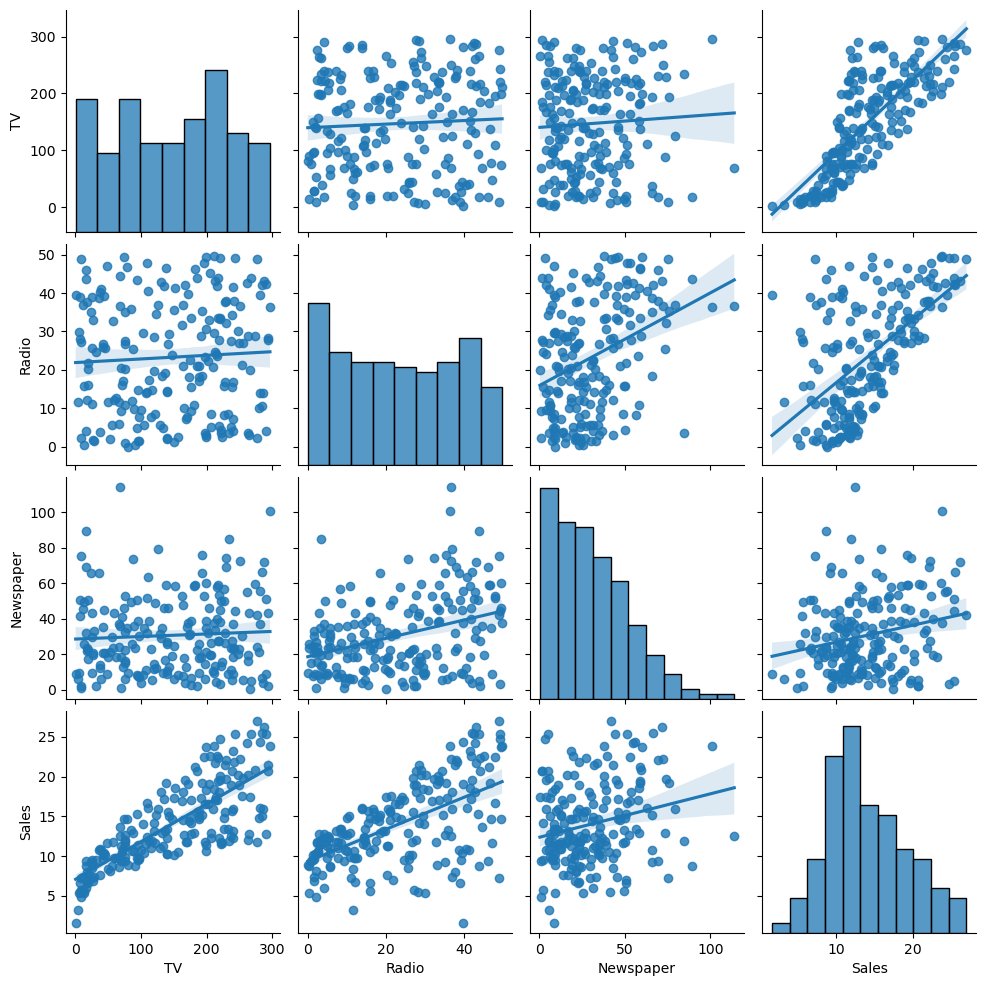

In [11]:
sns.pairplot(adv,kind ='reg')

**Making regression plot.**

Text(0.5, 1.0, 'Newapaper Vs. Sales')

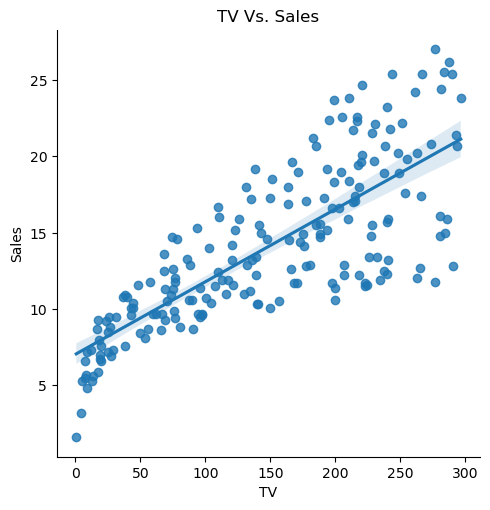

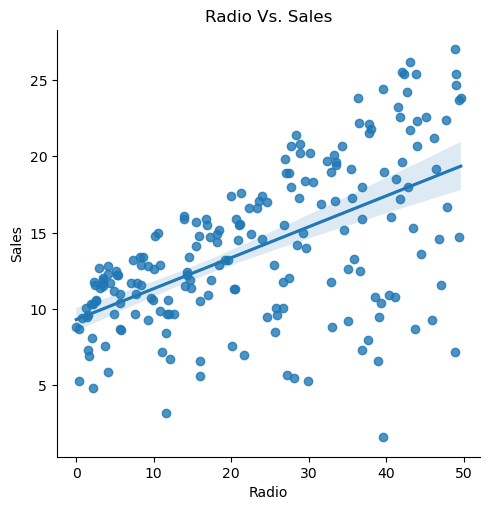

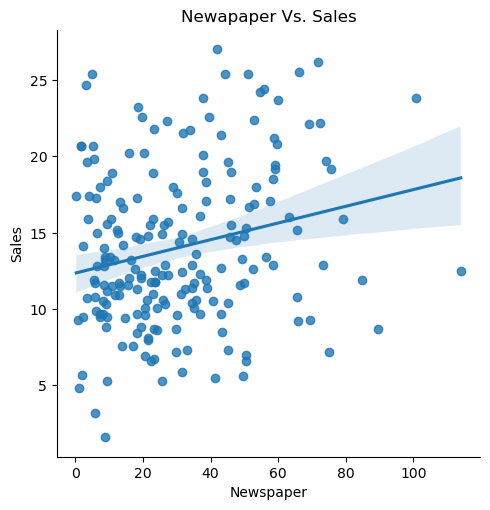

In [12]:
sns.lmplot(x='TV', y='Sales', data=adv)
plt.title("TV Vs. Sales")
sns.lmplot(x='Radio', y='Sales', data=adv)
plt.title("Radio Vs. Sales")
sns.lmplot(x='Newspaper', y='Sales', data=adv)
plt.title("Newapaper Vs. Sales")


***3.Preparing the dataset for the training and testing the models.***

In [13]:
X = adv.drop('Sales', axis = 1)

In [14]:
Y = adv['Sales']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state =42)

In [16]:
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(160, 3) (40, 3)
(160,) (40,)


***3.1 Random Forest Regressor***

In [17]:
forest = RandomForestRegressor()

In [18]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
y_for = forest.predict(x_test)

In [20]:
print("Accuracy of the Random Forest Regressor Model on train set: {:0.2f}.".format(forest.score(x_train,y_train)*100))
print("Accuracy of the Random Forest Regressor Model on test set: {:0.2f}.".format(forest.score(x_test,y_test)*100))

Accuracy of the Random Forest Regressor Model on train set: 99.62.
Accuracy of the Random Forest Regressor Model on test set: 98.05.


In [21]:
mse_for = mean_squared_error(y_test,y_for)
rmse_for = np.sqrt(mse_for)
print("Root Mean Squared Error of Random Forest Model: {:0.2f}".format(rmse_for))
print("R2 Score of Random Forest Model: {:0.2f}".format(r2_score(y_test,y_for)))
print("Mean Absolute Error of Random Forest Model: {:0.2f}".format(mean_absolute_error(y_test,y_for)))

Root Mean Squared Error of Random Forest Model: 0.78
R2 Score of Random Forest Model: 0.98
Mean Absolute Error of Random Forest Model: 0.64


***3.2 Decision Tree Regressor***

In [22]:
tree = DecisionTreeRegressor()

In [23]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [24]:
y_tree = tree.predict(x_test)

In [25]:
print("Decision Tree Model Score on Trian Data:{:0.2f}".format(tree.score(x_train,y_train)*100))
print("Decision Tree Model Score on Test Data: {:0.2f}".format(tree.score(x_test,y_test)*100))

Decision Tree Model Score on Trian Data:100.00
Decision Tree Model Score on Test Data: 92.74


In [26]:
mse_tree = mean_squared_error(y_test,y_tree)
rmse_tree = np.sqrt(mse_tree)
print("Root Mean Squared Error of Decision Tree Model: {:0.2f}".format(rmse_tree))
print("R2 Score of Decision Tree Model: {:0.2f}".format(r2_score(y_test,y_tree)))
print("Mean Absolute Error of Decision Tree Model: {:0.2f}".format(mean_absolute_error(y_test,y_tree)))

Root Mean Squared Error of Decision Tree Model: 1.51
R2 Score of Decision Tree Model: 0.93
Mean Absolute Error of Decision Tree Model: 1.04


***3.3 Linear Regression***

In [27]:
lr= LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_lr =lr.predict(x_test)

In [30]:
print("Linear Regression Model Score on Trian Data:{:0.2f}".format(lr.score(x_train,y_train)*100))
print("Linear Regression Model Score on Test Data: {:0.2f}".format(lr.score(x_test,y_test)*100))

Linear Regression Model Score on Trian Data:89.57
Linear Regression Model Score on Test Data: 89.94


In [31]:
mse_lr = mean_squared_error(y_test,y_lr)
rmse_lr = np.sqrt(mse_lr)
print("Root Mean Squared Error of Linear Regression Model: {:0.2f}".format(rmse_lr))
print("R2 Score of Linear Regression Model: {:0.2f}".format(r2_score(y_test,y_lr)))
print("Mean Absolute Error of Linear Regression Model: {:0.2f}".format(mean_absolute_error(y_test,y_lr)))

Root Mean Squared Error of Linear Regression Model: 1.78
R2 Score of Linear Regression Model: 0.90
Mean Absolute Error of Linear Regression Model: 1.46


***3.4 Lasso Model***

In [32]:
las =Lasso()

In [33]:
las.fit(x_train,y_train)

Lasso()

In [34]:
y_las = las.predict(x_test)

In [35]:
print("Lasso Linear Model Score on Trian Data:{:0.2f}".format(lr.score(x_train,y_train)*100))
print("Lasso Linear Model Score on Test Data: {:0.2f}".format(lr.score(x_test,y_test)*100))

Lasso Linear Model Score on Trian Data:89.57
Lasso Linear Model Score on Test Data: 89.94


In [36]:
mse_las = mean_squared_error(y_test,y_las)
rmse_las = np.sqrt(mse_las)
print("Root Mean Squared Error of Lasso Linear Model: {:0.2f}".format(rmse_las))
print("R2 Score of Lasso Linear Model: {:0.2f}".format(r2_score(y_test,y_las)))
print("Mean Absolute Error of Lasso Linear Model: {:0.2f}".format(mean_absolute_error(y_test,y_las)))

Root Mean Squared Error of Lasso Linear Model: 1.77
R2 Score of Lasso Linear Model: 0.90
Mean Absolute Error of Lasso Linear Model: 1.45


***3.5 Gradient Boosting Regressor***

In [37]:
gbr = GradientBoostingRegressor()

In [38]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [39]:
y_gbr = gbr.predict(x_test)

In [40]:
print("Gradient Boosting Regressor Score on Trian Data:{:0.2f}".format(gbr.score(x_train,y_train)*100))
print("Gradient Boosting Regressor Score on Test Data: {:0.2f}".format(gbr.score(x_test,y_test)*100))

Gradient Boosting Regressor Score on Trian Data:99.87
Gradient Boosting Regressor Score on Test Data: 98.37


In [41]:
mse_gbr = mean_squared_error(y_test,y_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("Root Mean Squared Error of Gradient Boosting Regressor: {:0.2f}".format(rmse_gbr))
print("R2 Score of Gradient Boosting Regressor: {:0.2f}".format(r2_score(y_test,y_gbr)))
print("Mean Absolute Error of Gradient Boosting Regressor: {:0.2f}".format(mean_absolute_error(y_test,y_gbr)))

Root Mean Squared Error of Gradient Boosting Regressor: 0.72
R2 Score of Gradient Boosting Regressor: 0.98
Mean Absolute Error of Gradient Boosting Regressor: 0.61


***3.6 Support Vector Regression***

In [42]:
svr = SVR()

In [43]:
svr.fit(x_train,y_train)

SVR()

In [44]:
y_svr = svr.predict(x_test)

In [45]:
print("SVR Score on Trian Data:{:0.2f}".format(svr.score(x_train,y_train)*100))
print("SVR Score on Test Data: {:0.2f}".format(svr.score(x_test,y_test)*100))

SVR Score on Trian Data:84.02
SVR Score on Test Data: 87.31


In [46]:
mse_svr = mean_squared_error(y_test,y_svr)
rmse_svr = np.sqrt(mse_svr)
print("Root Mean Squared Error of Gradient Boosting Regressor: {:0.2f}".format(rmse_svr))
print("R2 Score of Gradient Boosting Regressor: {:0.2f}".format(r2_score(y_test,y_svr)))
print("Mean Absolute Error of Gradient Boosting Regressor: {:0.2f}".format(mean_absolute_error(y_test,y_svr)))

Root Mean Squared Error of Gradient Boosting Regressor: 2.00
R2 Score of Gradient Boosting Regressor: 0.87
Mean Absolute Error of Gradient Boosting Regressor: 1.51


***From the above models two models gives best prediction:-***

* Random Forest Model
* Gradient Booster Model

# Thank You!!!